In [3]:
import os
import numpy as np
import pandas as pd
import scipy.io

import seaborn as sns
import matplotlib.pyplot as plt
# from ipywidgets import interactive
%matplotlib inline

## Load data

In [122]:
d = {'mouse': [1329, 1329], 'date': ['201209', '201209_caiman'], 'area': ['V1', 'V1']}
meta = pd.DataFrame(data=d)
meta

,mouse,date,area
0,1329,201209,V1
1,1329,201209_caiman,V1


In [124]:
nset = len(meta.index); ncell = []; nori = 8; nisi = 3; nframe_trial = 207
# dir_name = 'C:\\Users\\lan\\Documents\\repos\\inter\\mat\\'
root_folder = 'C://Users/ll357/Documents/inter/'
dir_name = root_folder + 'mat/'

vis_ad = np.empty([0,1]); vis_tg = np.empty([0,1]); well_fit = np.empty([0,1])
ori_pref = np.empty([0,nisi]); fit_param = np.empty([0,7,nisi])
dfof_ad = np.empty([0,1]); dfof_tg = np.empty([0,nori,nisi])
dfof_ad_std = np.empty([0,1]); dfof_tg_std = np.empty([0,nori,nisi])
trace = np.empty([0,nori,nisi,nframe_trial])

for iset in np.arange(nset):
    dir_sub = str(meta.area[iset]) + '_i' + str(meta.mouse[iset]) + '_' + str(meta.date[iset])

    cell_prop = scipy.io.loadmat(os.path.join(dir_name, dir_sub, 'cell_property_loose' + '.mat'))
    dfof = scipy.io.loadmat(os.path.join(dir_name, dir_sub, 'dfof' + '.mat'))
    trace_align = scipy.io.loadmat(os.path.join(dir_name, dir_sub, 'trace_aligned' + '.mat'))
    fit_tuning = scipy.io.loadmat(os.path.join(dir_name, dir_sub, 'fit_tuning_isi3' + '.mat'))
    
    ncell.append(len(cell_prop['vis_cell_ad']))    
    vis_ad = np.concatenate((vis_ad, cell_prop['vis_cell_ad']), axis=0)
    vis_tg = np.concatenate((vis_tg, cell_prop['vis_cell_noad_tg']), axis=0)
#     well_fit = np.concatenate((well_fit, cell_prop['well_fit_cell']), axis=0)
    
    ori_pref = np.concatenate((ori_pref, cell_prop['ori_pref']), axis=0)
    fit_param = np.concatenate((fit_param, fit_tuning['fit_param']), axis=0)

    dfof_ad = np.concatenate((dfof_ad, dfof['dfof_ad']), axis=0)
    dfof_ad_std = np.concatenate((dfof_ad_std, dfof['dfof_ad_std']), axis=0)
    dfof_tg = np.concatenate((dfof_tg, dfof['dfof_tg']), axis=0)
    dfof_tg_std = np.concatenate((dfof_tg_std, dfof['dfof_tg_std']), axis=0)
    
    trace_flat = np.empty([ncell[iset],nori,nisi,nframe_trial]);
    for icell in np.arange(ncell[iset]):
        for iori in np.arange(nori):
            for iisi in np.arange(nisi):
                trace_flat[icell][iori][iisi][:] = trace_align['trace_avg'][icell][iori][iisi].flatten()
    trace = np.vstack((trace,trace_flat))

ncell, vis_ad.shape, vis_tg.shape#, well_fit.shape, ori_pref.shape, fit_param.shape, dfof_ad.shape, dfof_tg.shape, trace.shape

([146, 649], (795, 1), (795, 1))

In [10]:
meta['ncell'] = ncell
meta.loc[1, 'area'] = 'V1_caiman'
meta
# meta = meta.replace({'area' : { 'V1':1, 'LM':2, 'LI':3 }})
# meta

,mouse,date,area,ncell
0,1329,201209,V1,146
1,1329,201209_caiman,V1_caiman,649


In [11]:
mouse_cell = [item for item, count in zip(meta.mouse, meta.ncell) for i in range(count)]
area_cell = [item for item, count in zip(meta.area, meta.ncell) for i in range(count)]
meta_cell = pd.DataFrame({'mouse': mouse_cell, 'area': area_cell})
meta_cell

,mouse,area
0,1329,V1
1,1329,V1
2,1329,V1
3,1329,V1
4,1329,V1
...,...,...
790,1329,V1_caiman
791,1329,V1_caiman
792,1329,V1_caiman
793,1329,V1_caiman


## Adaptation magnitude

adaptation mag = response to target ori==0 with adapter / response to adapter - 1  
cell selection: vis_ad only, no dfof_ad thresholding

In [12]:
adp_mag = dfof_tg[:,0,[1,2]] / dfof_ad - 1

meta_cell_750 = meta_cell.copy(); meta_cell_750['isi'] = 750
meta_cell_250 = meta_cell.copy(); meta_cell_250['isi'] = 250
meta_cell_isi = pd.concat([meta_cell_750, meta_cell_250], ignore_index=True)

df_adp_mag = meta_cell_isi.copy()
df_adp_mag['adp_mag'] = adp_mag.flatten('F')
df_adp_mag['dfof_ad'] = np.concatenate((dfof_ad, dfof_ad), axis=0)

df_adp_mag['vis_ad'] = np.concatenate((vis_ad, vis_ad), axis=0)
df_adp_mag = df_adp_mag[ df_adp_mag['vis_ad'] == 1 ]
df_adp_mag.reset_index()

,index,mouse,area,isi,adp_mag,dfof_ad,vis_ad
0,0,1329,V1,750,-0.616792,0.028724,1.0
1,1,1329,V1,750,0.134058,0.021879,1.0
2,2,1329,V1,750,0.219169,0.017352,1.0
3,5,1329,V1,750,0.216044,0.030310,1.0
4,6,1329,V1,750,-0.425898,0.014881,1.0
...,...,...,...,...,...,...,...
533,1578,1329,V1_caiman,250,1.519280,0.011178,1.0
534,1580,1329,V1_caiman,250,1.401979,0.049173,1.0
535,1586,1329,V1_caiman,250,-0.179995,0.019492,1.0
536,1588,1329,V1_caiman,250,-0.706539,0.033669,1.0


In [14]:
df_adp_mag[df_adp_mag.area == 'V1_caiman'].vis_ad.describe() # 151 caiman cell are vis driven by ad

count    302.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: vis_ad, dtype: float64

In [18]:
df_adp_mag[['adp_mag','area','isi']].groupby(['area','isi'], sort=False).describe()

adp_mag                                                    \
                count      mean       std       min       25%       50%   
area      isi                                                             
V1        750   118.0 -0.197271  0.749729 -2.662299 -0.619847 -0.170157   
          250   118.0 -0.507737  0.679651 -2.774512 -0.846823 -0.508100   
V1_caiman 750   151.0 -0.136070  0.989742 -3.295186 -0.647305 -0.172239   
          250   151.0 -0.423806  0.873997 -3.002802 -0.824161 -0.433613   

                                   
                    75%       max  
area      isi                      
V1        750  0.179369  1.959110  
          250 -0.112148  2.360093  
V1_caiman 750  0.309312  4.038707  
          250 -0.088623  2.927617

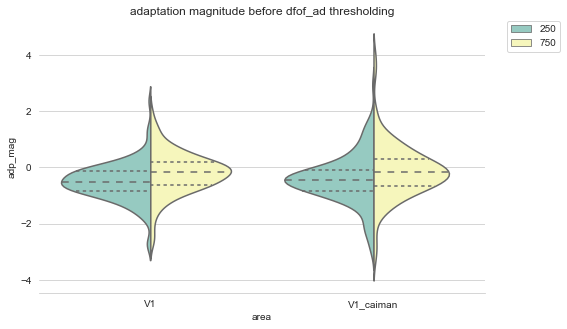

In [19]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
ax = sns.violinplot(data=df_adp_mag, x="area", y="adp_mag", hue="isi",
               split=True, inner="quart", palette="Set3")
sns.despine(left=True)
ax.set(title = 'adaptation magnitude before dfof_ad thresholding')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

### add dfof_ad thresholding

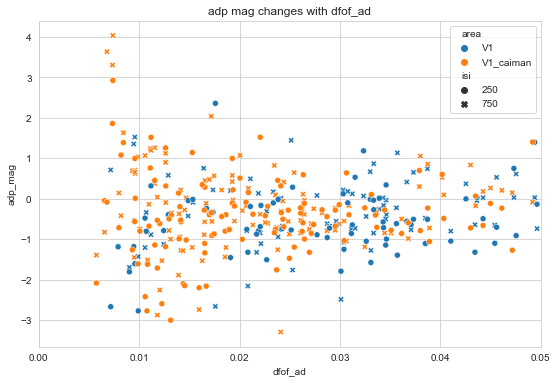

In [26]:
plt.figure(figsize=(9,6))
ax = sns.scatterplot(data=df_adp_mag, x="dfof_ad", y="adp_mag", hue="area", style="isi")
plt.xlim([0,0.2]);
plt.xlim([0,0.05]);
ax.set(title = 'adp mag changes with dfof_ad');

In [14]:
# df = df_adp_mag.sort_values(by=['dfof_ad'])
# df1 = df[df.isi == 750]
# df2 = df[df.isi == 250]

# def f(win):
#     plt.figure(figsize=(15,5))
#     plt.plot(df1.dfof_ad, df1['adp_mag'].rolling(win, min_periods=1).mean(), alpha=0.7)
#     plt.plot(df2.dfof_ad, df2['adp_mag'].rolling(win, min_periods=1).mean(), alpha=0.7)
#     plt.legend(['isi = 750', 'isi = 250'])
#     plt.xlim([0,0.1])
#     plt.xlabel('dfof_ad')
#     plt.ylabel('adaptation mag rolling mean')
#     plt.title('adp mag rolling mean change with dfof_ad of cells')
#     plt.show()

# interactive_plot = interactive(f, win=(2, 20))
# output = interactive_plot.children[-1]
# output.layout.height = '350px'
# interactive_plot

interactive(children=(IntSlider(value=11, description='win', max=20, min=2), Output(layout=Layout(height='350p…

In [15]:
# def f(win):
#     plt.figure(figsize=(15,5))
#     plt.plot(df1.dfof_ad, df1['adp_mag'].rolling(win, min_periods=1).std(), alpha=0.7)
#     plt.plot(df2.dfof_ad, df2['adp_mag'].rolling(win, min_periods=1).std(), alpha=0.7)
#     plt.legend(['isi = 750', 'isi = 250'])
#     plt.xlim([0,0.1])
#     plt.xlabel('dfof_ad')
#     plt.ylabel('adaptation mag rolling std')
#     plt.title('adp mag rolling std change with dfof_ad of cells')
#     plt.show()

# interactive_plot = interactive(f, win=(2, 20))
# output = interactive_plot.children[-1]
# output.layout.height = '350px'
# interactive_plot

interactive(children=(IntSlider(value=11, description='win', max=20, min=2), Output(layout=Layout(height='350p…

In [27]:
df_adp_mag

,mouse,area,isi,adp_mag,dfof_ad,vis_ad
0,1329,V1,750,-0.616792,0.028724,1.0
1,1329,V1,750,0.134058,0.021879,1.0
2,1329,V1,750,0.219169,0.017352,1.0
5,1329,V1,750,0.216044,0.030310,1.0
6,1329,V1,750,-0.425898,0.014881,1.0
...,...,...,...,...,...,...
1578,1329,V1_caiman,250,1.519280,0.011178,1.0
1580,1329,V1_caiman,250,1.401979,0.049173,1.0
1586,1329,V1_caiman,250,-0.179995,0.019492,1.0
1588,1329,V1_caiman,250,-0.706539,0.033669,1.0


<AxesSubplot:xlabel='adp_mag', ylabel='Count'>

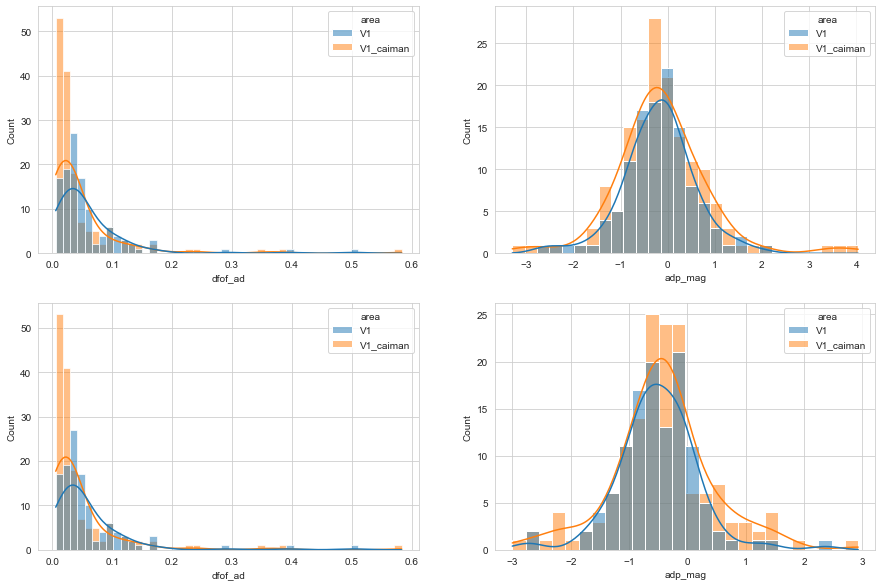

In [28]:
plt.figure(figsize=(15,10));
plt.subplot(221)
sns.histplot(data=df_adp_mag[df_adp_mag.isi == 750], x="dfof_ad", hue="area", kde=True)
plt.subplot(222)
sns.histplot(data=df_adp_mag[df_adp_mag.isi == 750], x="adp_mag", hue="area", kde=True)
plt.subplot(223)
sns.histplot(data=df_adp_mag[df_adp_mag.isi == 250], x="dfof_ad", hue="area", kde=True)
plt.subplot(224)
sns.histplot(data=df_adp_mag[df_adp_mag.isi == 250], x="adp_mag", hue="area", kde=True)

cell selection: vis_ad only, with dfof_ad thresholding

In [45]:
dfof_threshold_manual = 0.05
dfof_threshold_caiman = 0.02

df_adp_mag_thres = df_adp_mag[((np.abs(df_adp_mag.dfof_ad) >= dfof_threshold_manual) & (df_adp_mag.area == 'V1'))
                             | ((np.abs(df_adp_mag.dfof_ad) >= dfof_threshold_caiman) & (df_adp_mag.area == 'V1_caiman'))]
df_adp_mag_thres.reset_index();
df_adp_mag_thres

,mouse,area,isi,adp_mag,dfof_ad,vis_ad
12,1329,V1,750,0.482138,0.100776,1.0
13,1329,V1,750,-0.445284,0.054988,1.0
18,1329,V1,750,-0.253079,0.108583,1.0
19,1329,V1,750,-0.274539,0.098821,1.0
26,1329,V1,750,0.037246,0.053670,1.0
...,...,...,...,...,...,...
1568,1329,V1_caiman,250,-1.759391,0.023692,1.0
1573,1329,V1_caiman,250,-0.225307,0.026059,1.0
1580,1329,V1_caiman,250,1.401979,0.049173,1.0
1588,1329,V1_caiman,250,-0.706539,0.033669,1.0


In [47]:
df_adp_mag_thres[['adp_mag','area','isi']].groupby(['area','isi'], sort=False).describe()

adp_mag                                                    \
                count      mean       std       min       25%       50%   
area      isi                                                             
V1        750    45.0 -0.028107  0.507835 -0.739767 -0.337504 -0.078570   
          250    45.0 -0.394968  0.360393 -1.176509 -0.685362 -0.404675   
V1_caiman 750    90.0 -0.167603  0.641388 -3.295186 -0.547861 -0.174720   
          250    90.0 -0.366150  0.570019 -1.759391 -0.703264 -0.401922   

                                   
                    75%       max  
area      isi                      
V1        750  0.131535  1.959110  
          250 -0.146763  0.461438  
V1_caiman 750  0.172798  1.829127  
          250 -0.147338  1.522727

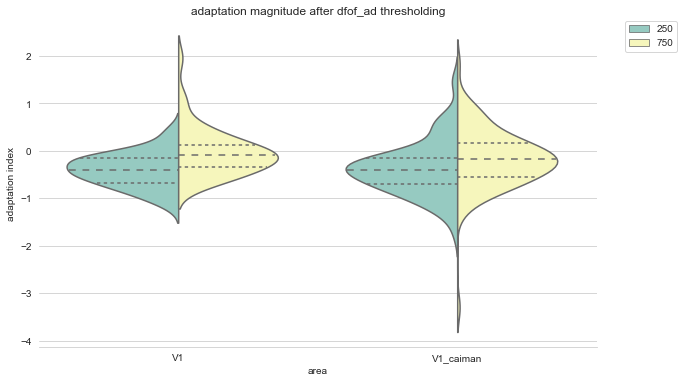

In [48]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
ax = sns.violinplot(data=df_adp_mag_thres, x="area", y="adp_mag", hue="isi",
               split=True, inner="quart", palette="Set3")
sns.despine(left=True)
ax.set(ylabel = 'adaptation index', title = 'adaptation magnitude after dfof_ad thresholding');
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

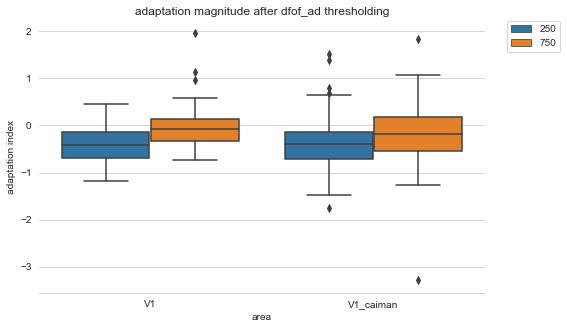

In [59]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
# ax = sns.boxplot(data=df_adp_mag_thres, x="area", y="adp_mag", hue="isi",
#                split=True, inner="quart", palette="Set3")

ax = sns.boxplot(data=df_adp_mag_thres, x="area", y="adp_mag", hue="isi")
# ax = sns.swarmplot(data=df_adp_mag_thres, x="area", y="adp_mag", hue="isi")

sns.despine(left=True)
ax.set(ylabel = 'adaptation index', title = 'adaptation magnitude after dfof_ad thresholding');
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

<AxesSubplot:xlabel='dfof_ad', ylabel='adp_mag'>

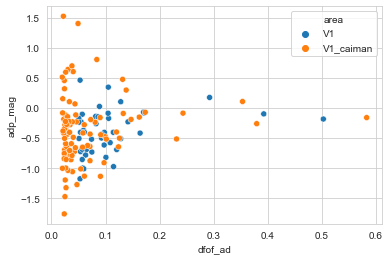

In [52]:
sns.scatterplot(data=df_adp_mag_thres[df_adp_mag_thres.isi==250], x="dfof_ad", y="adp_mag", hue="area")

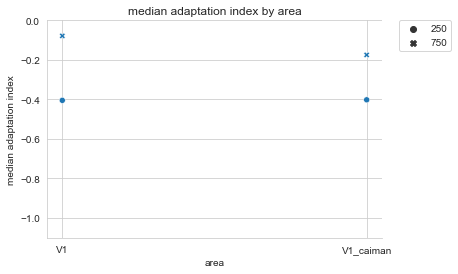

In [50]:
t = df_adp_mag_thres.copy()
tt = t[['adp_mag','area','isi']].groupby(['area','isi'], sort=False).median().reset_index()

ax = sns.scatterplot(data=tt, x="area", y="adp_mag", style="isi"); sns.despine()
ax.set(ylabel = 'median adaptation index', title = 'median adaptation index by area')
plt.ylim([-1.1,0])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

## Trace

### trace using all cells

In [80]:
trace_mean = np.mean(trace, axis=0)
trace_std = np.std(trace, axis=0)
trace_sem = trace_std / np.sqrt(trace.shape[0])

# compare btw isi
trace_mean = np.mean(trace_mean, axis=0)
trace_std = np.std(trace_std, axis=0)
trace_sem = trace_std / np.sqrt(trace.shape[0])
trace_mean.shape

(3, 207)

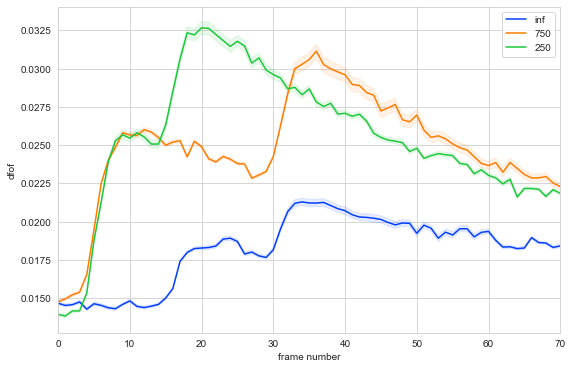

In [83]:
fig, ax = plt.subplots(figsize=(9,6))

for iisi in np.arange(nisi):
    ax.plot(np.arange(trace.shape[-1]), trace_mean[iisi,:].flatten(), 
            color=sns.color_palette("bright")[iisi])
    
    ax.fill_between(np.arange(trace.shape[-1]), 
                    trace_mean[iisi,:].flatten() + trace_sem[iisi,:].flatten(), 
                    trace_mean[iisi,:].flatten() - trace_sem[iisi,:].flatten(),
                    color=sns.color_palette("bright")[iisi], alpha=0.1)
plt.grid('minor')
plt.xlim(0,70)
plt.xlabel('frame number')
plt.ylabel('dfof')
plt.legend(['inf', '750', '250'])
plt.show()

In [79]:
trace_mean = np.mean(trace, axis=0)
trace_std = np.std(trace, axis=0)
trace_sem = trace_std / np.sqrt(trace.shape[0])

# visliz only isi=250
trace_mean = trace_mean[:,-1,:]
# trace_std = trace_std[:,-1,:]
trace_sem = trace_sem[:,-1,:]
trace_mean.shape

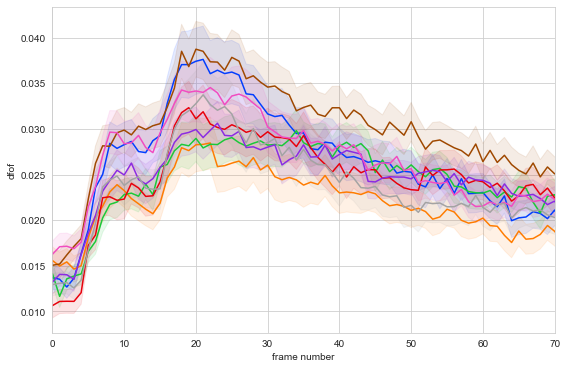

In [75]:
fig, ax = plt.subplots(figsize=(9,6))

for iori in np.arange(nori):
    ax.plot(np.arange(trace.shape[-1]), trace_mean[iori,:].flatten(), color=sns.color_palette("bright")[iori])
    ax.fill_between(np.arange(trace.shape[-1]), 
                    trace_mean[iori,:].flatten() + trace_sem[iori,:].flatten(), 
                    trace_mean[iori,:].flatten() - trace_sem[iori,:].flatten(),
                    color=sns.color_palette("bright")[iori], alpha=0.1)
plt.grid('minor')
plt.xlim(0,70)
# plt.ylim(-0.02,0.10)
plt.xlabel('frame number')
plt.ylabel('dfof')
plt.show()

### trace using vis driven & post thres dfof_ad

In [117]:
trace.shape, ncell, vis_ad.shape

((45, 8, 3, 207), [146, 649], (795, 1))

In [126]:
# select trace from vis-driven caiman / manual cells

vis_id = df_adp_mag_thres[df_adp_mag_thres.isi==750].index.values
vis_id_manual = vis_id[vis_id < ncell[0]]
vis_id_caiman = vis_id[vis_id >= ncell[0]]
# print(vis_id_manual)
# print(vis_id_caiman)

trace_manual = trace[vis_id_manual, :,:,:]
trace_caiman = trace[vis_id_caiman, :,:,:]
trace_manual.shape, trace_caiman.shape

[ 12  13  18  19  26  28  31  35  39  49  51  58  60  65  67  68  69  70
  71  72  73  74  80  81  82  86  87  88  89  90  93  98  99 100 103 105
 110 111 115 117 120 125 136 137 138]
[245 250 264 273 281 288 290 292 297 308 314 315 316 321 322 323 324 325
 327 332 333 334 335 336 338 345 346 347 349 355 357 363 366 367 368 390
 397 398 400 429 446 478 491 492 541 542 547 549 550 554 572 573 576 584
 593 603 610 612 618 619 627 631 638 649 659 660 672 673 683 684 686 687
 695 696 706 720 726 727 730 731 739 745 761 768 769 773 778 785 793 794]


((45, 8, 3, 207), (90, 8, 3, 207))

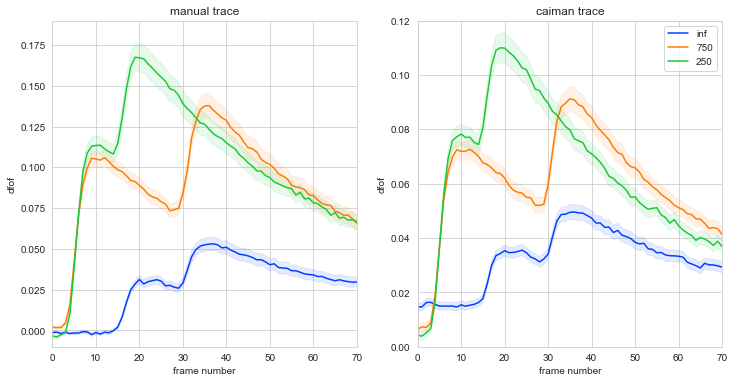

In [137]:
fig, ax = plt.subplots(1,2,figsize=(12,6)) # , sharey=True
ax_id = 0

for trace_now in [trace_manual, trace_caiman]:
    trace_mean = np.mean(np.mean(trace_now, axis=0), axis=0)
    trace_flatter = trace_now.reshape([-1, trace_now.shape[-2], trace_now.shape[-1]]) # flatten ncell x nori
    trace_std = np.std(trace_flatter, axis=0)
    trace_sem = trace_std / np.sqrt(trace_flatter.shape[0])

    for iisi in np.arange(nisi):
        ax[ax_id].plot(np.arange(trace_now.shape[-1]), trace_mean[iisi,:].flatten(), 
                color=sns.color_palette("bright")[iisi])

        ax[ax_id].fill_between(np.arange(trace_now.shape[-1]), 
                        trace_mean[iisi,:].flatten() + trace_sem[iisi,:].flatten(), 
                        trace_mean[iisi,:].flatten() - trace_sem[iisi,:].flatten(),
                        color=sns.color_palette("bright")[iisi], alpha=0.1)

    ax[ax_id].set_xlim(0,70)
    ax[0].set_ylim(-0.01, 0.19)
    ax[1].set_ylim(-0., 0.12)
    ax[ax_id].set_xlabel('frame number')
    ax[ax_id].set_ylabel('dfof')
    ax[0].set_title('manual trace')
    ax[1].set_title('caiman trace')
    plt.legend(['inf', '750', '250'])
    
    ax_id = ax_id + 1



## Adaptation tuning bias

In [53]:
tt = ori_pref.copy()
tt[tt > 90] = np.abs(tt[tt > 90] - 180)
tuning_bias = tt[:,[1,2]] - tt[:,[0]];

ori_pref_bin = tt[:,[0]];
ori_pref_bin[ori_pref_bin < 22.5] = 0; ori_pref_bin[ori_pref_bin > 67.5] = 90; 
ori_pref_bin[(ori_pref_bin >= 22.5) & (ori_pref_bin <= 67.5)] = 45; 

### run well fit func first

In [55]:
df_adp_tune = meta_cell_isi.copy()
df_adp_tune['tuning_bias'] = tuning_bias.flatten('F')
df_adp_tune['ori_pref_bin'] = np.concatenate((ori_pref_bin, ori_pref_bin), axis=0)

df_adp_tune['vis_ad'] = np.concatenate((vis_ad, vis_ad), axis=0)
# df_adp_tune['well_fit'] = np.concatenate((well_fit, well_fit), axis=0)
df_adp_tune = df_adp_tune[ df_adp_tune['vis_ad'] == 1 ]
# df_adp_tune = df_adp_tune[ df_adp_tune['well_fit'] == 1 ]

b, c = df_adp_tune.iloc[0].copy(), df_adp_tune.iloc[1].copy() 
df_adp_tune.iloc[0], df_adp_tune.iloc[1] = c, b # swap row 0 & 1 to sort df.gb properly
df_adp_tune.reset_index()

,index,mouse,area,isi,tuning_bias,ori_pref_bin,vis_ad
0,0,1329,V1,750,-12.820085,45.0,1.0
1,1,1329,V1,750,25.169578,45.0,1.0
2,2,1329,V1,750,3.407184,45.0,1.0
3,5,1329,V1,750,68.634700,0.0,1.0
4,6,1329,V1,750,30.508407,0.0,1.0
...,...,...,...,...,...,...,...
533,1578,1329,V1_caiman,250,13.579876,45.0,1.0
534,1580,1329,V1_caiman,250,-5.734379,0.0,1.0
535,1586,1329,V1_caiman,250,-6.772267,0.0,1.0
536,1588,1329,V1_caiman,250,67.444090,45.0,1.0


In [29]:
df_adp_tune[['tuning_bias','area','isi','ori_pref_bin']].groupby(['area','isi','ori_pref_bin'], sort=False).describe()

tuning_bias                                   \
                             count       mean        std        min   
area  isi ori_pref_bin                                                
V1    750 0.0                 14.0   4.237129   7.620755  -5.315182   
          45.0                30.0   2.981489   7.227020 -15.553142   
          90.0                 3.0  -9.225393   8.335961 -18.009150   
      250 0.0                 14.0   1.857337   4.603939  -6.714045   
          45.0                30.0  -2.411950   8.961618 -33.241919   
          90.0                 3.0  -5.399939   6.490821 -10.462322   
V1_py 750 0.0                 20.0  12.380400   9.491875  -7.572441   
          45.0                48.0   8.069886  10.901641 -14.255961   
          90.0                 4.0  -7.648601  13.042526 -21.515716   
      250 0.0                 20.0   7.711008   7.775619  -5.615133   
          45.0                48.0   2.719732   8.953192 -15.562213   
          90.0                 4.0 -10.572254  11.521881 -22.764059   

                                                                    
                              25%        50%        75%        max  
area  isi ori_pref_bin                                              
V1    750 0.0           -1.856112   3.324932   8.814326  22.372315  
          45.0          -0.571052   3.799186   8.926861  12.848284  
          90.0         -13.125919  -8.242688  -4.833515  -1.424341  
      250 0.0           -0.846012   2.326327   4.496529   9.510487  
          45.0          -6.775953  -0.042094   2.614331  11.071087  
          90.0          -9.058753  -7.655183  -2.868747   1.917688  
V1_py 750 0.0            5.649856  16.771778  18.981520  27.684480  
          45.0           1.991290   8.586735  13.244796  34.504417  
          90.0         -13.476329  -9.487657  -3.659929   9.896627  
      250 0.0            3.210260   6.534778  11.914546  22.951653  
          45.0          -2.188122   3.256615   6.591427  31.952141  
          90.0         -16.121038 -12.198005  -6.649221   4.871053

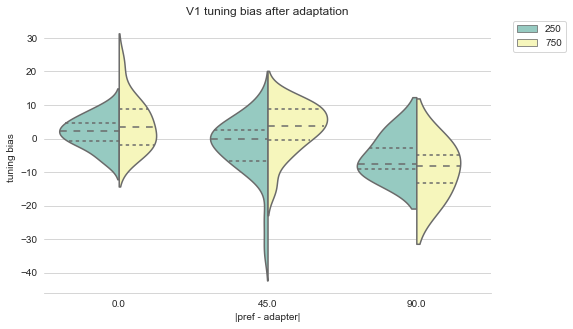

In [30]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
ax = sns.violinplot(data=df_adp_tune[df_adp_tune.area == 'V1'], 
                    x="ori_pref_bin", y="tuning_bias", hue="isi", 
                    split=True, inner="quart", palette="Set3")
sns.despine(left=True)
ax.set(xlabel = '|pref - adapter|', ylabel = 'tuning bias', title = 'V1 tuning bias after adaptation')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

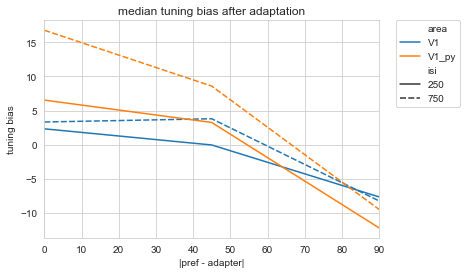

In [31]:
tt = df_adp_tune[['tuning_bias','area','isi','ori_pref_bin']].groupby(['area','isi','ori_pref_bin'], sort=False).median().reset_index()

ax = sns.lineplot(data=tt, x="ori_pref_bin", y="tuning_bias", hue="area", style="isi");
ax.set(xlabel = '|pref - adapter|', ylabel = 'tuning bias', title = 'median tuning bias after adaptation')
plt.xlim([0,90])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

## Misc
### Adaptation increases variability (?)
for ori=0 target after adaptation, fano factor is higher than adapter  
cell selection: vis_ad only, with thresholding of dfof_ad & dfof_tg0

In [32]:
adp_fano_tg = dfof_tg_std[:,0,[1,2]] / dfof_tg[:,0,[1,2]]
adp_fano_ad = dfof_ad_std / dfof_ad
adp_fano = (adp_fano_tg - adp_fano_ad) / (adp_fano_tg + adp_fano_ad) # range [-1,1], meaning fano factor de/increase after adp
# adp_fano = (adp_fano_tg - adp_fano_ad) / (adp_fano_ad)

df_adp_fano = meta_cell_isi.copy()
df_adp_fano['adp_fano'] = adp_fano.flatten('F')
df_adp_fano['dfof_ad'] = np.concatenate((dfof_ad, dfof_ad), axis=0)
df_adp_fano['dfof_tg'] = np.concatenate((dfof_tg[:,0,1], dfof_tg[:,0,2]), axis=0)

df_adp_fano['vis_ad'] = np.concatenate((vis_ad, vis_ad), axis=0)
df_adp_fano = df_adp_fano[ df_adp_fano['vis_ad'] == 1 ]

df_adp_fano = df_adp_fano[(df_adp_fano.dfof_ad >= dfof_threshold) & (df_adp_fano.dfof_tg >= dfof_threshold)]
df_adp_fano.reset_index()

,index,mouse,area,isi,adp_fano,dfof_ad,dfof_tg,vis_ad
0,0,1322,V1,750,0.198528,0.083296,0.063308,1.0
1,1,1322,V1,750,0.249547,0.079051,0.057910,1.0
2,2,1322,V1,750,0.224684,0.089755,0.098024,1.0
3,3,1322,V1,750,0.069735,0.149961,0.111251,1.0
4,4,1322,V1,750,0.079733,0.242218,0.230214,1.0
...,...,...,...,...,...,...,...,...
2033,2489,1322,V1_py,250,0.205993,0.128877,0.106924,1.0
2034,2490,1322,V1_py,250,0.261484,0.228478,0.167853,1.0
2035,2491,1322,V1_py,250,0.203939,0.208646,0.182107,1.0
2036,2492,1322,V1_py,250,0.438674,0.124743,0.078732,1.0


In [33]:
df_adp_fano[['adp_fano','area','isi']].groupby(['area','isi'], sort=False).describe()

adp_fano                                                    \
             count      mean       std       min       25%       50%   
area  isi                                                              
V1    750     61.0  0.107590  0.131371 -0.221762  0.055359  0.117452   
      250     56.0  0.096801  0.126978 -0.184001  0.009455  0.110434   
V1_py 750    926.0  0.118435  0.120498 -0.311766  0.036897  0.125030   
      250    995.0  0.197022  0.118755 -0.419078  0.124784  0.202259   

                               
                75%       max  
area  isi                      
V1    750  0.192632  0.396914  
      250  0.186146  0.408596  
V1_py 750  0.198302  0.492126  
      250  0.273186  0.553499

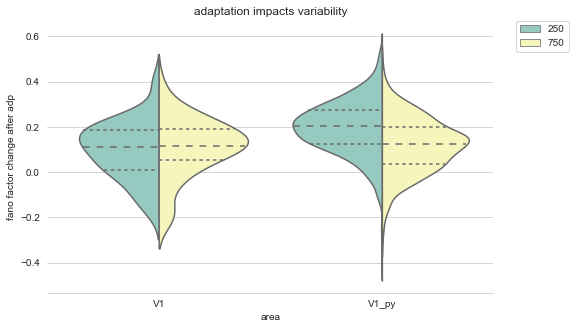

In [34]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
ax = sns.violinplot(data=df_adp_fano, x="area", y="adp_fano", hue="isi",
               split=True, inner="quart", palette="Set3")
sns.despine(left=True)
ax.set(ylabel = 'fano factor change after adp', title = 'adaptation impacts variability')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);